<a href="https://colab.research.google.com/github/Anastas1aMakarova/Machine-Learning/blob/main/Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построить нечеткую базу знаний (использовать не менее 3 лингвистических переменных) для задачи регулирования кондиционера (учитывать его мощность, объем помещения, температуру окружающей среды, необходимую температуру в помещении и т.д.), проверить ее на полноту и произвести нечеткий вывод для конкретных значений (выбрать случайным образом).
49.49999999999997


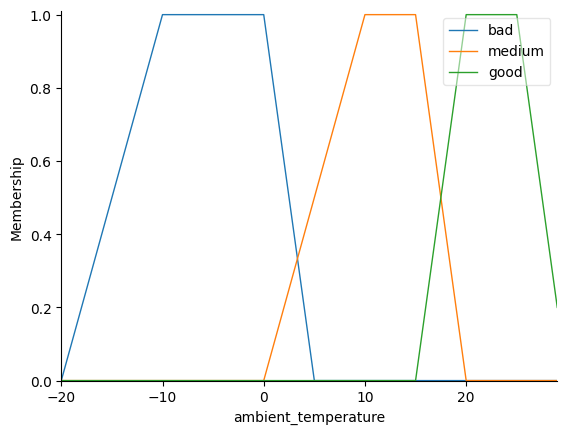

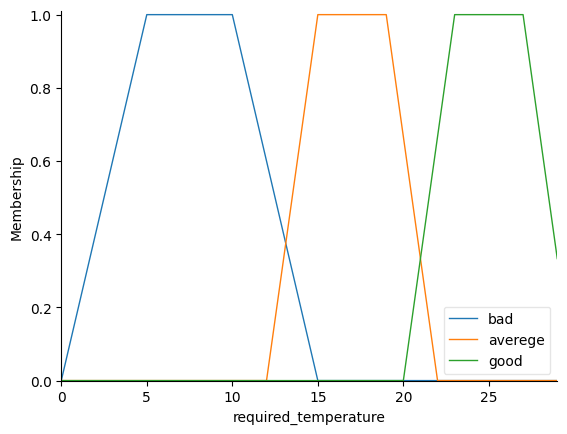

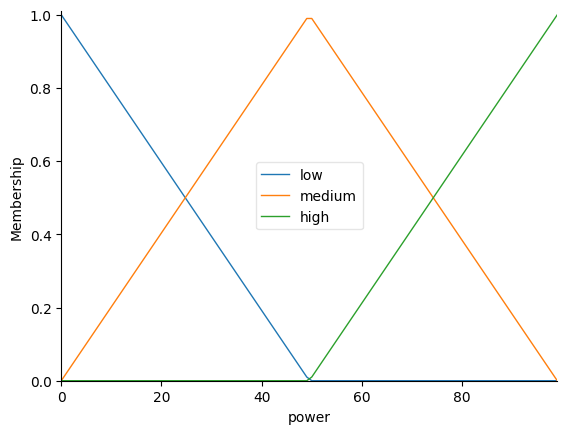

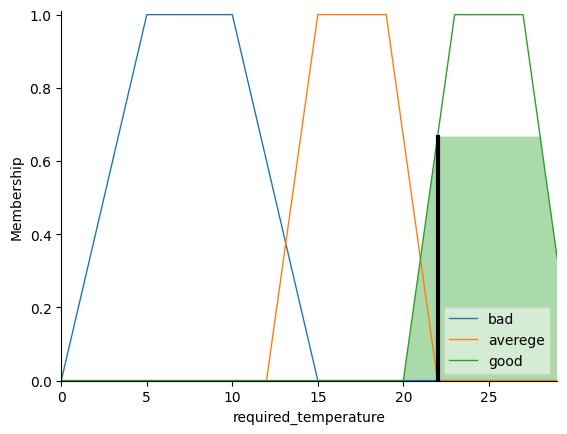

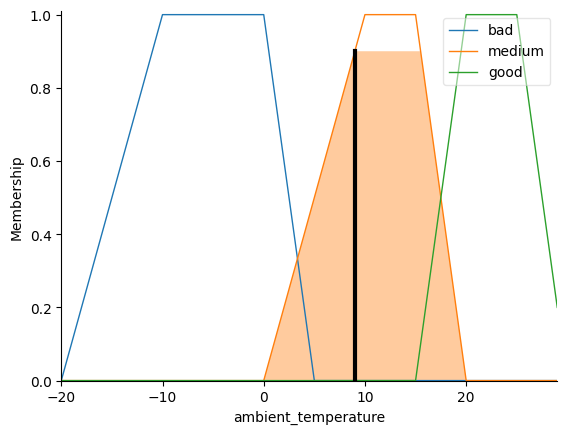

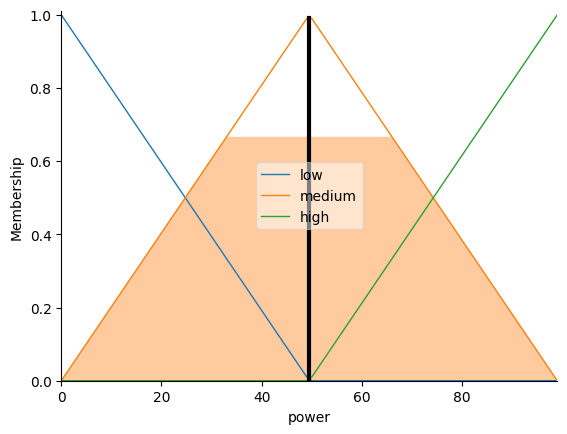

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

print("Построить нечеткую базу знаний (использовать не менее 3 лингвистических переменных) для задачи регулирования кондиционера (учитывать его мощность, объем помещения, температуру окружающей среды, необходимую температуру в помещении и т.д.), проверить ее на полноту и произвести нечеткий вывод для конкретных значений (выбрать случайным образом).")
# переменные для задачи
ambient_temperature = ctrl.Antecedent(np.arange(-20, 30, 1), 'ambient_temperature') #градусы по цельсию
required_temperature = ctrl.Antecedent(np.arange(0, 30, 1), 'required_temperature') #градусы по цельсию
power = ctrl.Consequent(np.arange(0, 100, 1), 'power') #по шкале от 1 до 100
#используем стандартную функцию принадлежности (треугольник)
power.automf(names=['low', 'medium', 'high'])
ambient_temperature['bad'] = fuzz.trapmf(ambient_temperature.universe, [-20, -10, 0, 5])
ambient_temperature['medium'] = fuzz.trapmf(ambient_temperature.universe, [0, 10, 15, 20])
ambient_temperature['good'] = fuzz.trapmf(ambient_temperature.universe, [15, 20, 25, 30])
required_temperature['bad'] = fuzz.trapmf(required_temperature.universe, [0, 5, 10, 15])
required_temperature['averege'] = fuzz.trapmf(required_temperature.universe,[12, 15, 19, 22])
required_temperature['good'] = fuzz.trapmf(required_temperature.universe,[20, 23, 27, 30])
#построение графиков
ambient_temperature.view()
required_temperature.view()
power.view()
# база правил
rule1 = ctrl.Rule(ambient_temperature['bad'] & required_temperature['bad'], power['low'])
rule2 = ctrl.Rule(ambient_temperature['bad'] & required_temperature['averege'], power['medium'])
rule3 = ctrl.Rule(ambient_temperature['bad'] & required_temperature['good'], power['high'])
rule4 = ctrl.Rule(ambient_temperature['medium'] & required_temperature['bad'], power['medium'])
rule5 = ctrl.Rule(ambient_temperature['medium'] & required_temperature['averege'], power['low'])
rule6 = ctrl.Rule(ambient_temperature['medium'] & required_temperature['good'], power['medium'])
rule7 = ctrl.Rule(ambient_temperature['good'] & required_temperature['bad'], power['high'])
rule8 = ctrl.Rule(ambient_temperature['good'] & required_temperature['averege'], power['medium'])
rule9 = ctrl.Rule(ambient_temperature['good'] & required_temperature['good'], power['low'])
power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
power_simulator= ctrl.ControlSystemSimulation(power_ctrl)
power_simulator.input['ambient_temperature'] = 9
power_simulator.input['required_temperature'] = 22
#результат
power_simulator.compute()
print(power_simulator.output['power'])
required_temperature.view(sim=power_simulator)
ambient_temperature.view(sim=power_simulator)
power.view(sim=power_simulator)